# API documentation

The functions below are part of the pypo module and are
separted below based on their functionality.

## Conventional mapping (AIS to AOS)

### Forward mapping

```{eval-rst}
.. autofunction:: pypo.AIS2AOS_map
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing PyPO and Numpy:

In [1]:
    from pypo import AIS2AOS_map
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [2]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds, as well as the discretization resolution:

In [3]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    resolution =  [5, 5]

Obtain discretized AIS/AOS.

In [4]:
    AIS, AOS =  AIS2AOS_map(shower_problem, AIS_bounds,  resolution)
    print(AOS)

[[[  0.       90.     ]
  [  2.5     120.     ]
  [  5.      120.     ]
  [  7.5     120.     ]
  [ 10.      120.     ]]

 [[  2.5      60.     ]
  [  5.       90.     ]
  [  7.5     100.     ]
  [ 10.      105.     ]
  [ 12.5     108.     ]]

 [[  5.       60.     ]
  [  7.5      80.     ]
  [ 10.       90.     ]
  [ 12.5      96.     ]
  [ 15.      100.     ]]

 [[  7.5      60.     ]
  [ 10.       75.     ]
  [ 12.5      84.     ]
  [ 15.       90.     ]
  [ 17.5      94.28571]]

 [[ 10.       60.     ]
  [ 12.5      72.     ]
  [ 15.       80.     ]
  [ 17.5      85.71429]
  [ 20.       90.     ]]]


### Inverse mapping (AOS/DOS to AIS/DIS)

### NLP-Based

```{eval-rst}
.. autofunction:: pypo.nlp_based_approach
```

###### Example
Obtaining the Feasible Desired Input Set (DIS*) for the shower problem.

Importing PyPO and Numpy:

In [5]:
    import numpy as np
    from pypo import nlp_based_approach

Defining lower and upper bound for the AIS/DIS inverse map:

In [6]:
    lb = np.array([0, 0])
    ub = np.array([100,100])

Defining DOS bounds and resolution to obtain the inverse map:

In [7]:
    DOS_bound = np.array([[17.5, 21.0],
                          [80.0, 100.0]])
    resolution = [10, 10]

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [8]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Obtaining the DIS*, DOS* and the convergence for each inverse map run. 
Additionally, using IPOPT as NLP solver, enabling plotting of the process operability
sets, cold-starting the
NLP and using finite-differences:

  0%|                                                                                                                                               | 0/100 [00:00<?, ?it/s]

  2%|██▋                                                                                                                                    | 2/100 [00:00<00:08, 12.20it/s]

  4%|█████▍                                                                                                                                 | 4/100 [00:00<00:07, 12.85it/s]

  6%|████████                                                                                                                               | 6/100 [00:00<00:07, 12.54it/s]

  8%|██████████▊                                                                                                                            | 8/100 [00:00<00:07, 12.65it/s]

 10%|█████████████▍                                                                                                                        | 10/100 [00:00<00:07, 12.80it/s]

 12%|████████████████                                                                                                                      | 12/100 [00:00<00:07, 12.51it/s]

 14%|██████████████████▊                                                                                                                   | 14/100 [00:01<00:06, 12.31it/s]

 16%|█████████████████████▍                                                                                                                | 16/100 [00:01<00:06, 12.37it/s]

 18%|████████████████████████                                                                                                              | 18/100 [00:01<00:06, 12.73it/s]

 20%|██████████████████████████▊                                                                                                           | 20/100 [00:01<00:06, 13.23it/s]

 22%|█████████████████████████████▍                                                                                                        | 22/100 [00:01<00:06, 12.77it/s]

 24%|████████████████████████████████▏                                                                                                     | 24/100 [00:01<00:06, 12.47it/s]

 26%|██████████████████████████████████▊                                                                                                   | 26/100 [00:02<00:05, 12.48it/s]

 28%|█████████████████████████████████████▌                                                                                                | 28/100 [00:02<00:05, 12.71it/s]

 30%|████████████████████████████████████████▏                                                                                             | 30/100 [00:02<00:05, 13.15it/s]

 32%|██████████████████████████████████████████▉                                                                                           | 32/100 [00:02<00:05, 12.80it/s]

 34%|█████████████████████████████████████████████▌                                                                                        | 34/100 [00:02<00:05, 12.22it/s]

 36%|████████████████████████████████████████████████▏                                                                                     | 36/100 [00:02<00:05, 12.02it/s]

 38%|██████████████████████████████████████████████████▉                                                                                   | 38/100 [00:03<00:05, 12.16it/s]

 40%|█████████████████████████████████████████████████████▌                                                                                | 40/100 [00:03<00:04, 12.90it/s]

 42%|████████████████████████████████████████████████████████▎                                                                             | 42/100 [00:03<00:04, 12.66it/s]

 44%|██████████████████████████████████████████████████████████▉                                                                           | 44/100 [00:03<00:04, 12.47it/s]

 46%|█████████████████████████████████████████████████████████████▋                                                                        | 46/100 [00:03<00:04, 12.21it/s]

 48%|████████████████████████████████████████████████████████████████▎                                                                     | 48/100 [00:03<00:04, 12.41it/s]

 50%|███████████████████████████████████████████████████████████████████                                                                   | 50/100 [00:03<00:03, 12.77it/s]

 52%|█████████████████████████████████████████████████████████████████████▋                                                                | 52/100 [00:04<00:03, 12.18it/s]

 54%|████████████████████████████████████████████████████████████████████████▎                                                             | 54/100 [00:04<00:03, 12.35it/s]

 56%|███████████████████████████████████████████████████████████████████████████                                                           | 56/100 [00:04<00:03, 12.35it/s]

 58%|█████████████████████████████████████████████████████████████████████████████▋                                                        | 58/100 [00:04<00:03, 12.61it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 60/100 [00:04<00:03, 13.12it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████                                                   | 62/100 [00:04<00:03, 12.52it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████▊                                                | 64/100 [00:05<00:02, 12.31it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▍                                             | 66/100 [00:05<00:02, 11.55it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████                                           | 68/100 [00:05<00:02, 11.99it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 70/100 [00:05<00:02, 12.39it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 72/100 [00:05<00:02, 11.94it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 74/100 [00:05<00:02, 11.95it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 76/100 [00:06<00:01, 12.11it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 78/100 [00:06<00:01, 12.43it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 80/100 [00:06<00:01, 12.91it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 82/100 [00:06<00:01, 12.23it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 84/100 [00:06<00:01, 12.29it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 86/100 [00:06<00:01, 11.91it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 88/100 [00:07<00:00, 12.51it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 90/100 [00:07<00:00, 13.03it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 92/100 [00:07<00:00, 12.67it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 94/100 [00:07<00:00, 12.57it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 96/100 [00:07<00:00, 12.55it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 98/100 [00:07<00:00, 13.05it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.40it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.53it/s]

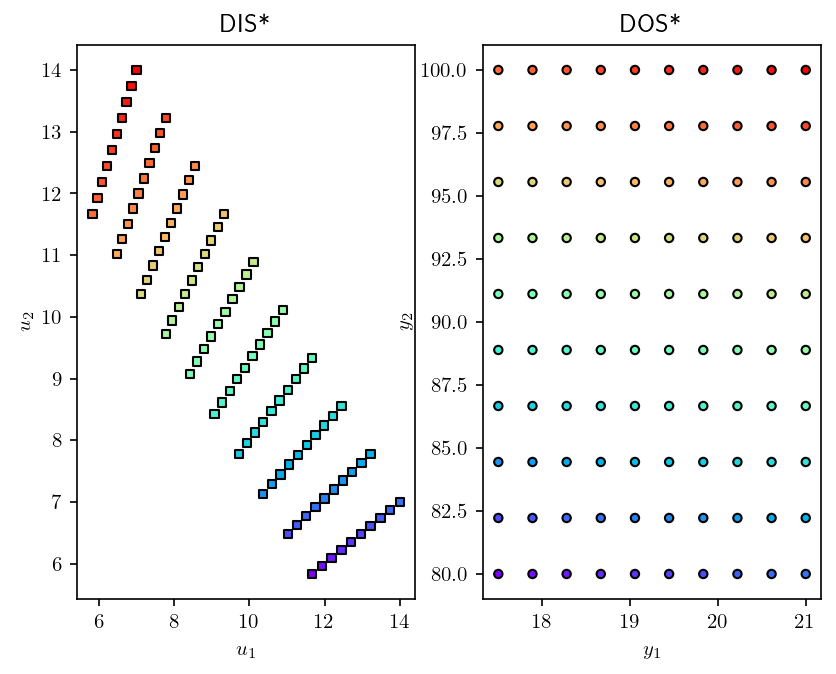

In [9]:
    u0 = u0 = np.array([0, 10]) # Initial estimate for inverse mapping.
    fDIS, fDOS, message = nlp_based_approach(DOS_bound, 
                                             resolution, 
                                             shower_problem, 
                                             u0, 
                                             lb,
                                             ub, 
                                             method='ipopt', 
                                             plot=True, 
                                             ad=False,
                                             warmstart=False)

## Implicit mapping

```{eval-rst}
.. autofunction:: pypo.implicit_map
```

## Multimodel representation

```{eval-rst}
.. autofunction:: pypo.multimodel_rep
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing PyPO and Numpy:

In [10]:
    from pypo import multimodel_rep
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [11]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [12]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    AIS_resolution =  [5, 5]

Obtaining multimodel representation of paired polytopes for the AOS:

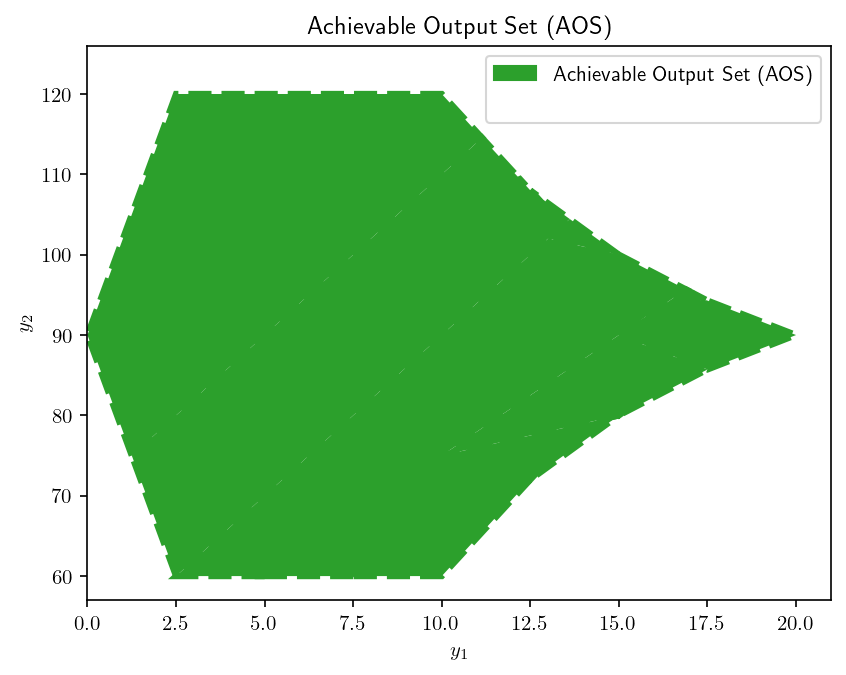

In [13]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem)

## OI evaluation

```{eval-rst}
.. autofunction:: pypo.OI
```

###### Example
Evaluating the OI for the shower problem for a given DOS.

Importing PyPO and Numpy:

In [14]:
    from pypo import multimodel_rep, OI
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [15]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [16]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    AIS_resolution =  [10, 10]

Obtaining multimodel representation of paired polytopes for the AOS:

In [17]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem)

KeyboardInterrupt: 

Defining a DOS region between $y_1 =[10-20], y_2=[70-100]$

In [ ]:
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

Evaluating the OI and seeing the intersection between the operability sets:

In [ ]:
    OI = OI(AOS_region, DOS_bounds)

## Utilities

```{eval-rst}
.. autofunction:: pypo.create_grid
```
###### Example
Creating a 2-dimensional discretized rectangular grid for given DOS bounds.

In [ ]:
    from pypo import create_grid
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

    DOS_resolution =  [5, 5]

    DOSPts = create_grid(DOS_bounds, DOS_resolution)

    print(DOSPts)

Visualizing this grid:

In [ ]:
    import matplotlib.pyplot as plt
    DOSPts = DOSPts.reshape(-1, 2)
    plt.scatter(DOSPts[:, 0], DOSPts[:, 1])

```{eval-rst}
.. autofunction:: pypo.points2simplices
```

###### Example
Generating paired simplicial polytopes for the AIS/AOS generated for the
shower problem example.

In [ ]:
    from pypo import points2simplices
    AIS_poly, AOS_poly = points2simplices(AIS,AOS)
    print('AIS Simplices \n', AIS_poly)
    print('AOS Simplices \n', AOS_poly)

```{eval-rst}
.. autofunction:: pypo.points2polyhedra


```

```{eval-rst}
.. autosummary::
   :toctree: _autosummary
   :recursive:

   pypo
```